# Monitoring of drying under winter wheat by ERT
This notebook shows how time-lapse electrical resistivity tomography (ERT) can help to follow the soil drying (mainly attributed to root water uptake) during the growth season.

This dataset was collected on 24 pins array (0.25 m electrode spacing) using a dipole-dipole sequence with a Syscal Pro 48 (Iris Instruments, Orléans, France). The experiment took place at Worburn (UK), a research station managed by Rothamsted Research in 2017 under winter wheat.

In [13]:
import matplotlib.pyplot as plt
from resipy.R2 import R2
datadir = './examples/dc-2d-timelapse/data/'

In [14]:
k = R2() # initiate an R2 instance
k.createTimeLapseSurvey([datadir + '17031501.csv',
                         datadir + '17040301.csv',
                         datadir + '17051601.csv'], ftype='Syscal')
k.filterUnpaired() # remove dummy quadrupoles added to make dipole-dipole faster

Working directory is: /media/jkl/data/phd/tmp/pyr2/src/resipy/invdir
clearing the dirname
Inf or NaN: filterData: 0 / 344 quadrupoles removed.
strange quadrupoles: filterData: 0 / 344 quadrupoles removed.
36/344 reciprocal measurements NOT found.
0 measurements error > 20 %
computed DOI : -2.50
./examples/dc-2d-timelapse/data/17031501.csv imported
--------- ./examples/dc-2d-timelapse/data/17031501.csv imported
Inf or NaN: filterData: 0 / 344 quadrupoles removed.
strange quadrupoles: filterData: 0 / 344 quadrupoles removed.
36/344 reciprocal measurements NOT found.
0 measurements error > 20 %
./examples/dc-2d-timelapse/data/17040301.csv imported
--------- ./examples/dc-2d-timelapse/data/17040301.csv imported
Inf or NaN: filterData: 0 / 344 quadrupoles removed.
strange quadrupoles: filterData: 0 / 344 quadrupoles removed.
36/344 reciprocal measurements NOT found.
0 measurements error > 20 %
./examples/dc-2d-timelapse/data/17051601.csv imported
--------- ./examples/dc-2d-timelapse/data/17

108

Text(0.5, 1.0, '(c) 2017-05-16')

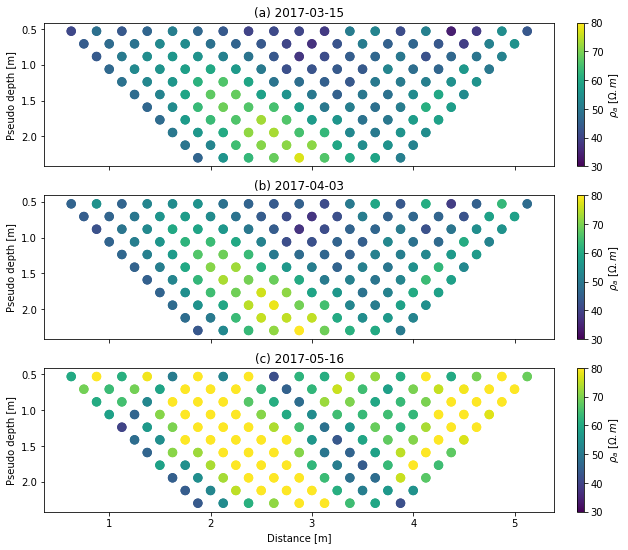

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(10, 9), sharex=True)
ax = axs[0]
k.showPseudo(index=0, ax=ax, vmin=30, vmax=80)
ax.set_title('(a) 2017-03-15')
ax.set_xlabel('')
ax = axs[1]
k.showPseudo(index=1, ax=ax, vmin=30, vmax=80)
ax.set_title('(b) 2017-04-03')
ax.set_xlabel('')
ax = axs[2]
k.showPseudo(index=2, ax=ax, vmin=30, vmax=80)
ax.set_title('(c) 2017-05-16')

Error model is R_err = 0.00 R_avg^1.123 (R^2 = 0.9851)


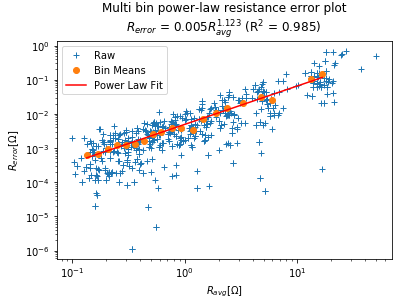

In [3]:
k.fitErrorPwl(index=-2) # fit a power-law error model for all dataset aggregated

computed DOI : -2.50
Generating gmsh input file...

doi in gmshWrap.py: -2.500000
dp_len in gmshWrap.py: 5.750000
adding surface points and electrodes to input file...
0 polygons added to input file
0 boundary(ies) added to input file
writing .geo to file completed, save location:
/media/jkl/data/phd/tmp/pyr2/src/resipy/invdir

parsing gmsh mesh...

importing node coordinates...
reading connection matrix
ignoring 0 non-triangle elements in the mesh file, as they are not required for R2
664 element node orderings had to be corrected because they were found to be orientated clockwise

written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/resipy/invdir/mesh.dat
Mesh plotted in   0.60 seconds


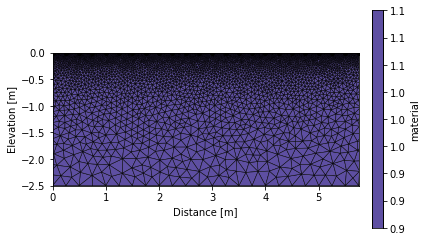

In [4]:
k.createMesh(typ='trian', cl=0.02, cl_factor=20, show_output=False) # create a triangular mesh with a characteristic length of 0.5
k.showMesh() # display the mesh

In [5]:
k.invert(parallel=True) # run the inversion (and write R2.in and protocol.dat automatically)

Writing .in file and protocol.dat...
written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/resipy/invdir/mesh.dat
Matching quadrupoles between surveys for difference inversion...314 in common...done in 0.025133s
+++++++++ 17031501
done!

------------ INVERTING REFERENCE SURVEY ---------------

written mesh.dat file to 
/media/jkl/data/phd/tmp/pyr2/src/resipy/invdir/mesh.dat


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v3.3 <<

 >> D a t e : 18 - 03 - 2020
 >> My beautiful survey
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 

Mesh plotted in   0.42 seconds
Mesh plotted in   0.45 seconds


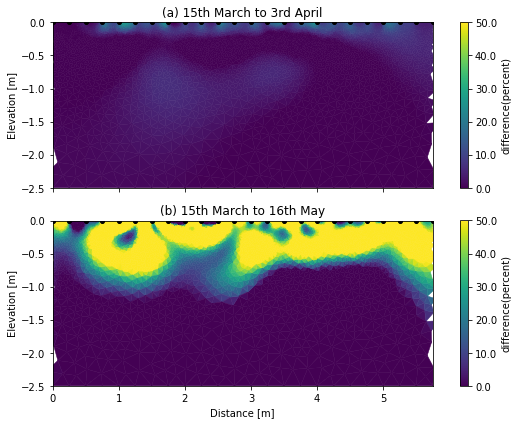

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
ax = axs[0]
ax.set_title('(a) 15th March to 3rd April')
k.showResults(ax=ax, index=1, attr='difference(percent)', vmin=0, vmax=50, sens=False)
ax.set_xlabel(None)
ax = axs[1]
ax.set_title('(b) 15th March to 16th May')
k.showResults(ax=ax, index=2, attr='difference(percent)', vmin=0, vmax=50, sens=False)
fig.tight_layout()